Model Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           3       0.96      1.00      0.98        26
           4       1.00      0.86      0.92         7

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50



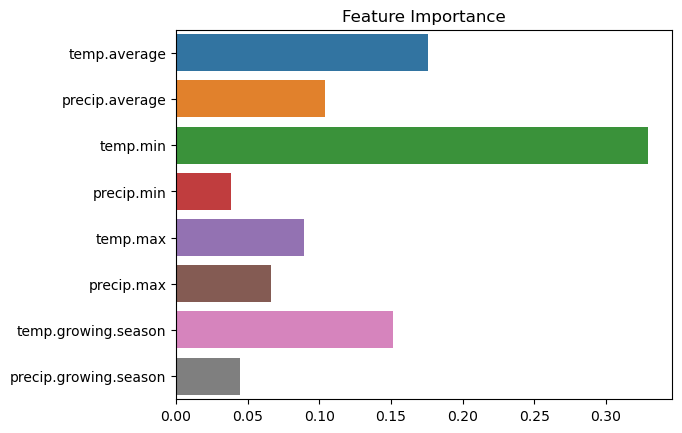

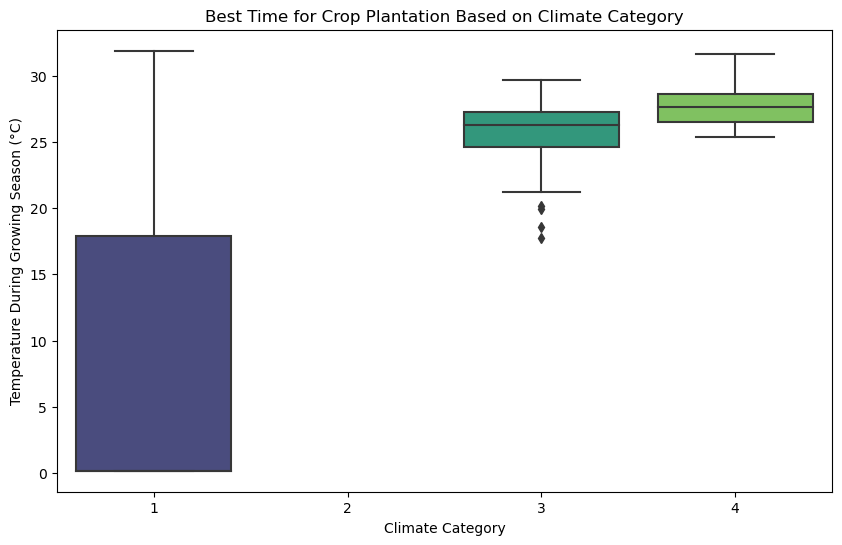

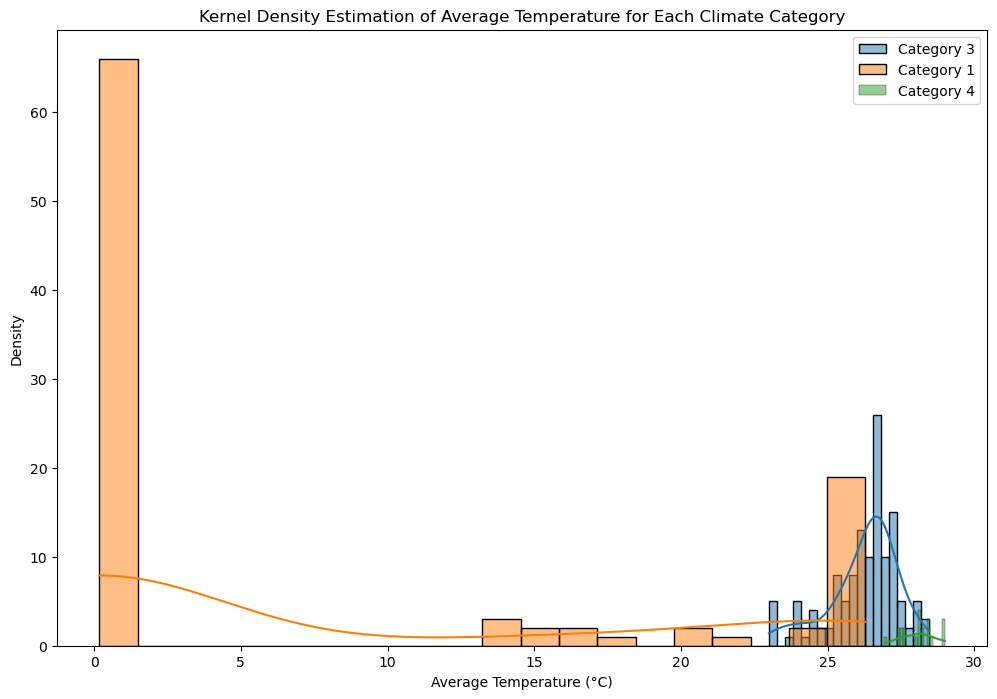

Suitability Prediction for the Crop: 1


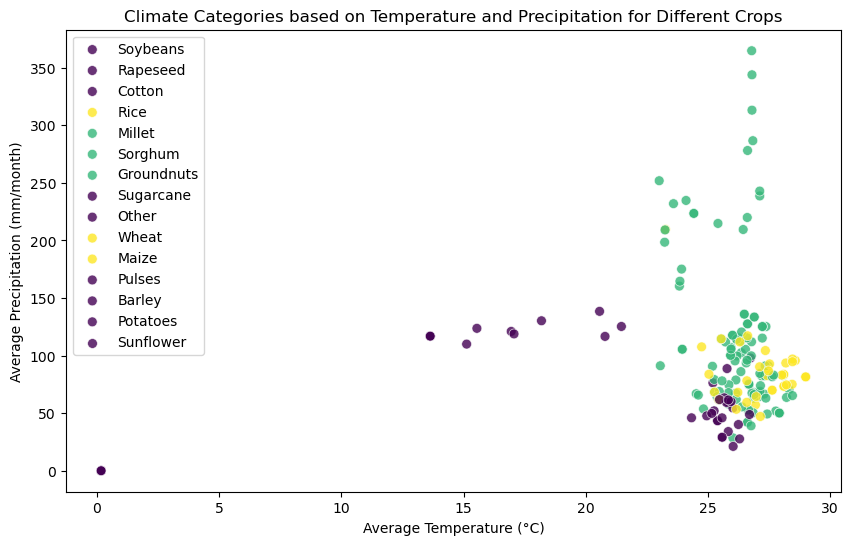

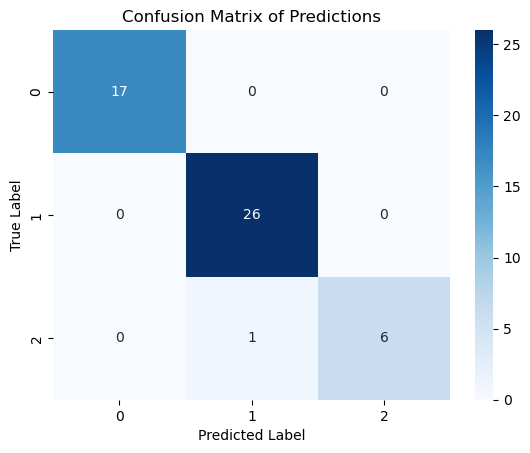

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


data = pd.read_csv('Data_for_analysis.csv')

# Data cleaning and preprocessing
# Replace NaN values with random values
data.fillna(value=np.random.random(), inplace=True)

# Convert the target variable into categorical bins
bins = [0, 1, 2, 3, 4]  
labels = [1, 2, 3, 4]  
data['climate.category'] = pd.cut(data['climate.category'], bins=bins, labels=labels)

# Feature selection
features = ['temp.average', 'precip.average', 'temp.min', 'precip.min', 'temp.max', 'precip.max', 'temp.growing.season', 'precip.growing.season']
target = 'climate.category'


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

# Best Time for Crop Plantation - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='climate.category', y='temp.growing.season', data=data, palette='viridis')
plt.xlabel('Climate Category')
plt.ylabel('Temperature During Growing Season (°C)')
plt.title('Best Time for Crop Plantation Based on Climate Category')
plt.show()

# Kernel Density Estimation of Average Temperature for Each Climate Category
plt.figure(figsize=(12, 8))
for category in data['climate.category'].unique():
    subset = data[data['climate.category'] == category]
    sns.histplot(subset['temp.average'], bins=20, kde=True, label=f'Category {category}')

plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Average Temperature for Each Climate Category')
plt.legend()
plt.show()

crop_data = data.sample(1) 
crop_prediction = model.predict(crop_data[features])
print(f"Suitability Prediction for the Crop: {crop_prediction[0]}")

# Scatter Plot for Different Crops
plt.figure(figsize=(10, 6))
for crop in data['Crop'].unique():
    crop_subset = data[data['Crop'] == crop]
    plt.scatter(crop_subset['temp.average'], crop_subset['precip.average'], c=crop_subset['climate.category'], cmap='viridis', s=50, alpha=0.8, edgecolors='w', linewidths=0.5, label=crop)

plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Precipitation (mm/month)')
plt.title('Climate Categories based on Temperature and Precipitation for Different Crops')
plt.legend()
plt.show()

# Save the trained model for future use
joblib.dump(model, 'crop_suitability_model.joblib')


# plt.figure(figsize=(10, 6))
# for category in data['climate.category'].unique():
#     subset = data[data['climate.category'] == category]
#     sns.histplot(subset['temp.average'], bins=20, kde=True, label=f'Category {category}')

# plt.xlabel('Average Temperature (°C)')
# plt.ylabel('Density')
# plt.title('Kernel Density Estimation of Average Temperature for Each Climate Category')
# plt.legend()
# plt.show()


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix of Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
